<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 4 - Funciones de transformación básica

### 1. Funciones de transformación básica
<ul>
<li>Histograma de una imagen</li>
<li>Operaciones puntuales</li>
<li>Transformaciones lógicas</li>

</ul>

<img src="res/pipeline.png"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

Se resaltan ciertas características de la imagen (bordes, contraste, …) y se ocultan o eliminan otras  (por ejemplo, el ruido)

El preprocesamiento es una etapa previa que es necesaria para otras fases posteriores del proceso de visión artificial (segmentación, extracción de características, reconocimiento e interpretación).


<img src="res/prepro.png">

En esta ocasión nos centraremos en las operaciones básicas de transformación.



# 1. Funciones de transformación básicas
<br>
En esta sesión veremos las formas básicas de operar y transformar una imagen. Estas operaciones nos serán de utilidad en las próximas sesiones para poder implementar algoritmos de filtrado o corrección.
<br><br>
Cualquier operación de procesamiento de imagenes puede ser clasificada segun su funcionamiento como: <i>operación puntual</i> u <i>operación por vecindad</i>.

<br>
<center><i>Figura. Tipos de operaciones de procesamiento de imágenes.</i></center>
<img src="res/operaciones1.png" alt="operaciones" style="height:300px"></img>
<img src="res/operaciones2.png" style="height:330px"/>

<hr>

## 1.1. Histograma de una imagen
<ul>
    <li>El histograma de una imagen presenta la frecuencia de ocurrencia de los niveles de gris en la imagen, es decir, determina la distribución de frecuencias de los niveles de gris en la imagen.</li>
    <br>
    <li>Son un elemento importante en la etapa de Pre-procesamiento pues este nos ayuda a comprender y a determinar qué transformaciones usar para mejorar la calidad de una imagen.</li>
</ul>
<br>
<center><i>Figura. Histograma de una imagen.</i></center>
<img src="res/m3/histograma.png" alt="operaciones" style="height:300px"></img>
<br>
Un Ejemplo Simple …. Se trata de una imagen en niveles de gris muy simple, de 8x8 píxeles de tamaño. Sólo son posibles 4 niveles de gris, porque se van a usar 2 bits para codificar el nivel de intensidad de cada píxel. De la forma  habitual,  los  niveles  de  gris  se  numeran  del  0  al  3,  correspondiendo  un  brillo mayor a los valores más altos.
<br>
<center><i>Figura. ¿Cuál es el algoritmo para calcular el histograma?.</i></center>
<img src="res/m3/histograma_2.png" alt="operaciones" style="height:200px"></img>
<br>

Los histogramas (en su caso normalizado) se definen como la probabilidad de ocurrencia de un valor de gris, mediante la siguiente ecuación:
<center><h2>$P(g)=\frac{N(g)}{M}$</h2></center>
<br>
Donde N(g) es un contador de pixeles cuyo valor es g y M es el numero total de pixeles de la imagen.
<br>
<ul>

<li>Los histogramas son una herramienta para el análisis de imágenes que permite determinar qué tan bueno es el contraste y la iluminación de la escena en la imagen.</li>
<li>En este sentido, el histograma nos ayuda a decidir cuál es el procesamiento más adecuado para mejorar la calidad de una imagen, tanto cualitativamente (nos sugiere qué operación aplicar), como cuantitativamente (en qué cantidad aplicar la operación).</li>
<li>En principio, una buena imagen debe producir un histograma más o menos uniforme y repartido en todo el rango de valores de niveles de gris, teniendo en cuenta que:</li>
    <ul>
    <li>En la parte izquierda se acumulan los tonos más oscuros.</li>
    <li>En la derecha se acumulan los más claros.</li>
    </ul>
</ul>
<br>
A continuación un ejemplo en Python de imágenes con propiedades distintas asociadas al histograma:
<hr>

In [14]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline 
from skimage import io, color
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
#la función ravel de numpy permite "aplanar" una matriz y volverla un vector 1-Dimensional
img1 = io.imread('res/m3/low_light.png')
print(img1.ravel())

[ 77  97 119 ...  19   9 255]


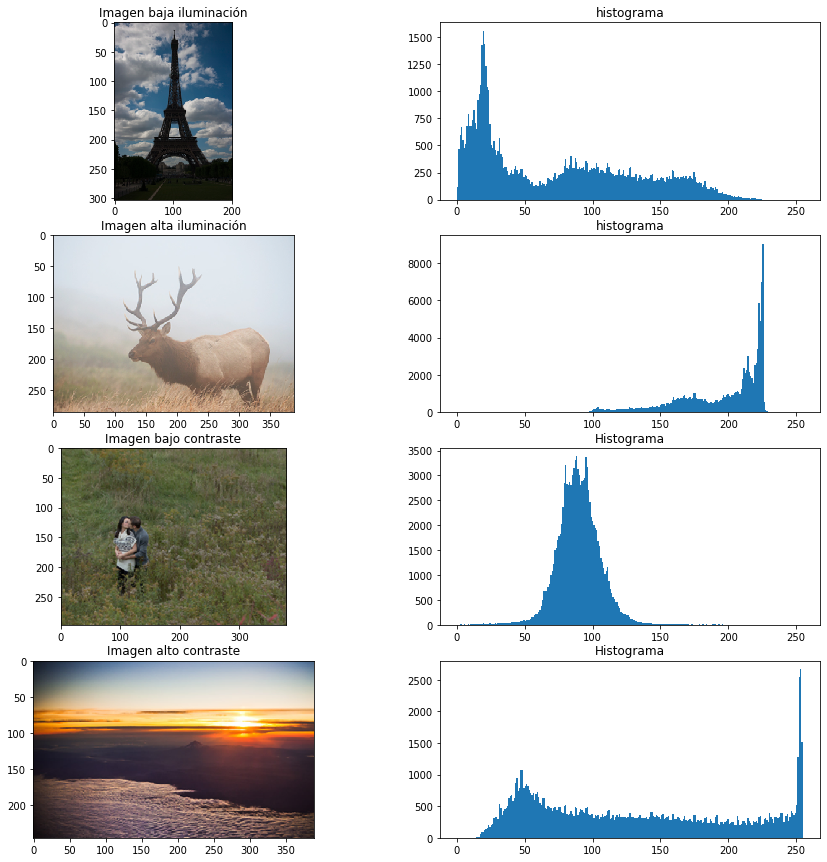

In [32]:
#Leer las imágenes 1 a la 4 en RGB
img1 = io.imread('res/m3/low_light.png')
img2 = io.imread('res/m3/hi_light.png')
img3 = io.imread('res/m3/low_contrast.png')
img4 = io.imread('res/m3/hi_contrast.png')

#_ = es una forma de eliminar el verbose de matplotlib

#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Imagen baja iluminación')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(img1)
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(img1[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Imagen alta iluminación')
arreglo_plots[1,0].imshow(img2)
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img2[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Imagen bajo contraste')
arreglo_plots[2,0].imshow(img3)
arreglo_plots[2,1].set_title('Histograma')
_ = arreglo_plots[2,1].hist(img3[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Imagen alto contraste')
arreglo_plots[3,0].imshow(img4)
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img4[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

### Analicemos
<br>
Las siguientes imágenes se encuentran en la ruta res/m3/ y sus nombres son: example_1, example_2, example_3, example_4
<br>
<center><i>Figura. ¿Qué tipo de histograma tiene cada imagen?.</i></center>
<img src="res/m3/analisis_histograma.png" alt="operaciones" style="height:400px"></img>

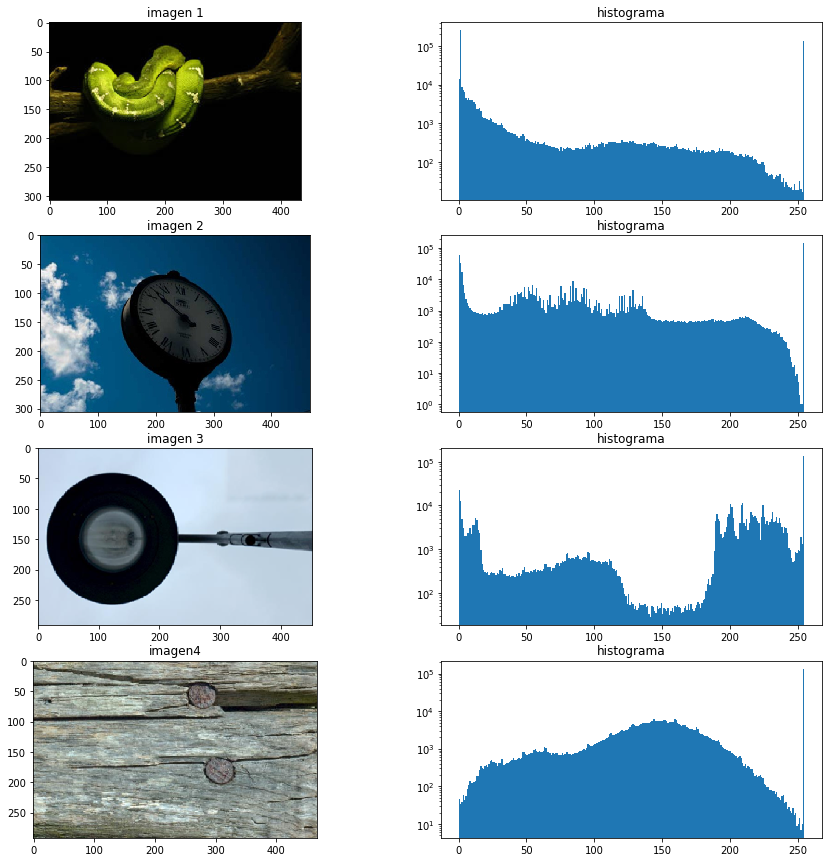

In [33]:
#Lectura de las imágenes
I1 = io.imread('res/m3/example_1.png')
I2 = io.imread('res/m3/example_2.png')
I3 = io.imread('res/m3/example_3.png')
I4 = io.imread('res/m3/example_4.png')
#Conversión de RGB a Escala de grises para cada imagen
#I1 = color.rgb2gray(I1)
#I2 = color.rgb2gray(I2)
#I3 = color.rgb2gray(I3)
#I4 = color.rgb2gray(I4)

#_ = es una forma de eliminar el verbose de matplotlib
#Se debe "aplanar" la imagen antes
I1_array=I1.ravel()
#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('imagen 1')
#Imprimir la imagen I1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(I1, cmap="gray")
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(I1_array, bins=255, range=(0.0, 255.0), log=True)

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
I2_array=I2.ravel()
arreglo_plots[1,0].set_title('imagen 2')
arreglo_plots[1,0].imshow(I2, cmap="gray")
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(I2_array, bins=255, range=(0.0, 255.0),log=True)

I3_array=I3.ravel()
arreglo_plots[2,0].set_title('imagen 3')
arreglo_plots[2,0].imshow(I3, cmap="gray")
arreglo_plots[2,1].set_title('histograma')
_ = arreglo_plots[2,1].hist(I3_array, bins=255, range=(0.0, 255.0),log=True)

I4_array=I4.ravel()
arreglo_plots[3,0].set_title('imagen4')
arreglo_plots[3,0].imshow(I4, cmap="gray")
arreglo_plots[3,1].set_title('histograma')
_ = arreglo_plots[3,1].hist(I4_array, bins=255, range=(0.0, 255.0),log=True)

## 2. Operaciones puntuales
<br>
Se denominan operaciones puntuales a aquellas que obtienen una nueva imagen producto de aplicar una operación global sobre cada pixel de la imagen, es decir, que alteran la imagen aplicando a cada pixel de la imagen una transformación que solo depende de ese píxel en esa imagen:
<br>
<center><i>Figura. Operacion puntual.</i></center>
<img src="res/m3/operaciones_2.png" alt="operaciones" style="height:200px"></img>
<br>
Donde I es la imagen original, G es la imagen resultante, F es la operación global que se aplica y (x, y) son los valores de filas y columnas de la imagen.
<br><br>

### Transformaciones lineales
<br>
La forma general de una transformación lineal es la siguiente:
<h3>$G(x,y)=a*I(x,y)+b$</h3>
<br>
De esta forma, dependiendo de los valores de a y b, se pueden tener las siguientes transformaciones:
<ul>
    <li>Si a = 1 y b = 0 entonces g(x, y) = f (x, y) (Identidad)</li>
    <li>Si a = 1 y b > 0, el nivel de gris se aumenta en b unidades (Suma)</li>
    <li>Si a = 1 y b < 0, el nivel de gris se disminuye en b unidades (Resta)</li>
    <li>Si a > 1, se produce un incremento del contraste (Multiplicación)</li>
    <li>Si 0 < a < 1, se reduce el contraste (División)</li>
    <li>Si a = -1 y b = 255, se produce el negativo de la imagen
</ul>

# IMPORTANTE: 

Hasta el momento hemos trabajado con arreglos de numpy usando el tipo de dato uint8, esto significa que nuestros valores numéricos pueden tomar valores entre 0 y 255... 

Recordemos que cuando un valor supera el umbral máximo de un tipo de dato se da un *wrapping*, por ejemplo, si tenemos un valor de 255 y le sumamos 1, este se convertirá en 0:


In [34]:
#Se muestra un ejemplo simple del wrapping al sumar vectores con tipo de dato uint8
a = np.array([255,255,255], np.uint8)
b = np.array([1, 50, 128], np.uint8)
print("a:   {0}\nb:   {1}\na+b: {2}".format(a,b,a+b))

a:   [255 255 255]
b:   [  1  50 128]
a+b: [  0  49 127]


##### La consecuencia practica de esto será la generación de artefactos indeseados en las imágenes resultantes de las operaciones lineales.

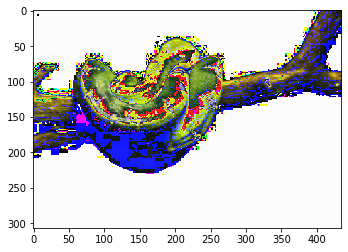

In [35]:
#Se muestra otro ejemplo, más gráfico, nuestra matriz ahora corresponde a una imagen
img = io.imread('res/m3/example_1.png')
#Se realiza la transformación lineal con los parámetros a, b.
a = 2
b = 250
#I(x,y) = img
plt.imshow(a*img + b)

### Implementemos una función que se encargue de esto...

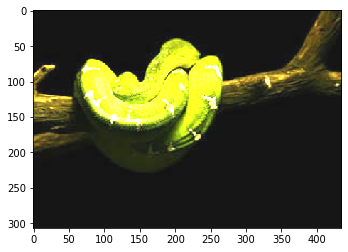

In [36]:
#Función transformación lineal en escala de grises, recibe parámetros imagen, a, b.
#Si la imagen esta en escala de grises, no tiene componente tridimensional (canales)
def linear_transform_grayscale(img, a, b):
    #tam es una matriz del tamaño de la imagen original
    tam = np.shape(img)
    #Lectura de cada posición de la imagen
    for i in range(tam[0]):
        for j in range(tam[1]):
            #Aplicar a cada valor asociado en la posición i,j la transformación lineal
            value = img[i][j]*a + b
            #Condicional para eliminar el efecto del "wrapping"
            if(value > 255):
                img[i][j] = 255
            elif(value < 0):
                img[i][j] = 0
            else:
                img[i][j] = value
    return img #regresar la imagen transformada

#Dado que la imagen ya no esta en escala de grises, posee una tercera componente, los canales de color
def linear_transform_color(img, a, b):
    #tam es una matriz del tamaño de la imagen original
    tam = np.shape(img)
    #Lectura de cada valor en la posición i,j de la imagen, en cada uno de los k canales.
    for i in range(tam[0]):
        for j in range(tam[1]):
            for k in range(tam[2]):
                #Aplicar la transformación lineal al valor i,j del canal k.
                value = img[i][j][k]*a + b
                #Condicional para evitar el efecto del "wrapping"
                if(value > 255):
                    img[i][j][k] = 255
                elif(value < 0):
                    img[i][j][k] = 0
                else:
                    img[i][j][k] = value
    return img #regresar la imagen transformada 

#Asignar los parámetros a, b de la transformación lineal.
a = 2
b = 20
#Imprimir la imagen tras la transformación.
plt.imshow(linear_transform_color(img,a,b))

# OJO 

Pese a que implementemos estos métodos para evitar la generación de artefactos, salirnos de los límites de intensidad de la imagen implica una **PÉRDIDA** de información. Ej: Dos píxeles con valores de intensidad de 250 y 240, si sumamos 20 píxeles a la imagen, el contraste entre ambos píxeles se pierde. Este fenómeno se llama **SATURACIÓN**.

En todo caso, la implementación anterior es ineficiente, es preferible usar las que facilita OpenCV...

* add
* subtract
* multiply


# Operación de suma 

La **suma** aumenta el brillo de las imágenes, ya que histograma de la imagen se desplaza b valores a la derecha.




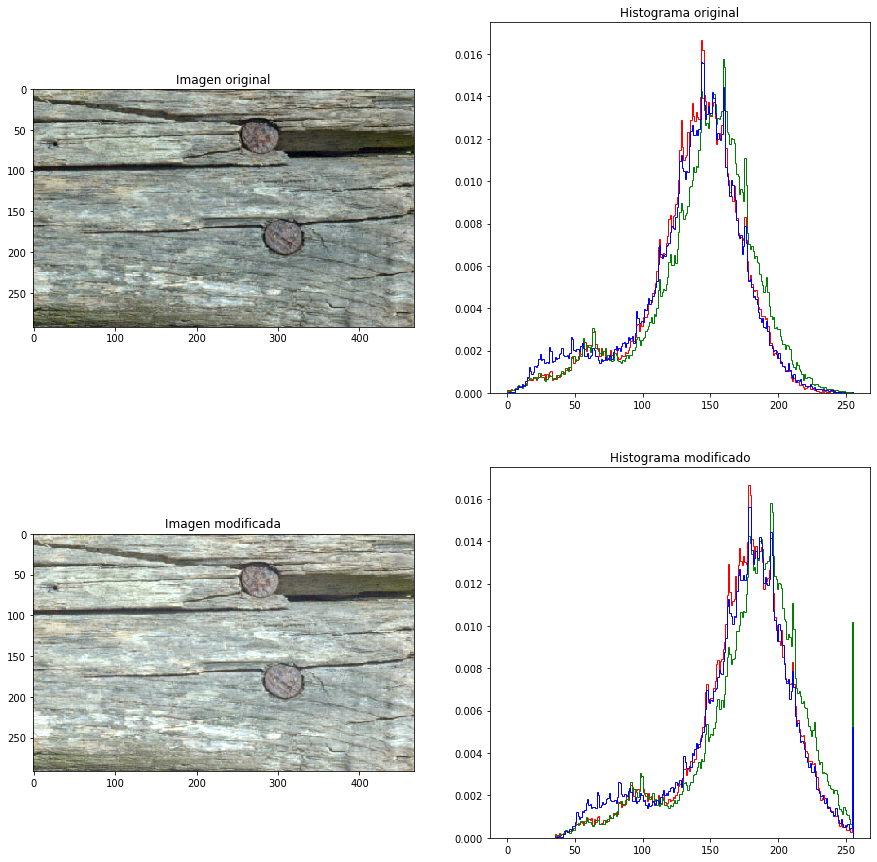

In [37]:
#Se realiza la lectura de la imagen
img = cv2.cvtColor(cv2.imread('res/m3/example_4.png'), cv2.COLOR_BGR2RGB)
#img_add es una matriz de ceros del mismo tamaño de la imagen original, corresponde a una copia para editar.
#el tipo de dato debe ser uint8 para estar entre 0 y 255
img_add = np.zeros(img.shape, np.uint8)

#A cada uno de los canales de img se le suman q,w,e unidades. 
q = 35 ; w = 35; e = 35
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
img_add[:,:,0] = cv2.add(img[:,:,0], q)
img_add[:,:,1] = cv2.add(img[:,:,1], w)
img_add[:,:,2] = cv2.add(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_add, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_add[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Operación de resta 


La **resta** disminuye el brillo de las imágenes, y se da cuando el valor de b es menor a cero. Cuando se produce una resta, el histograma de la imagen se desplaza b valores a la izquierda.




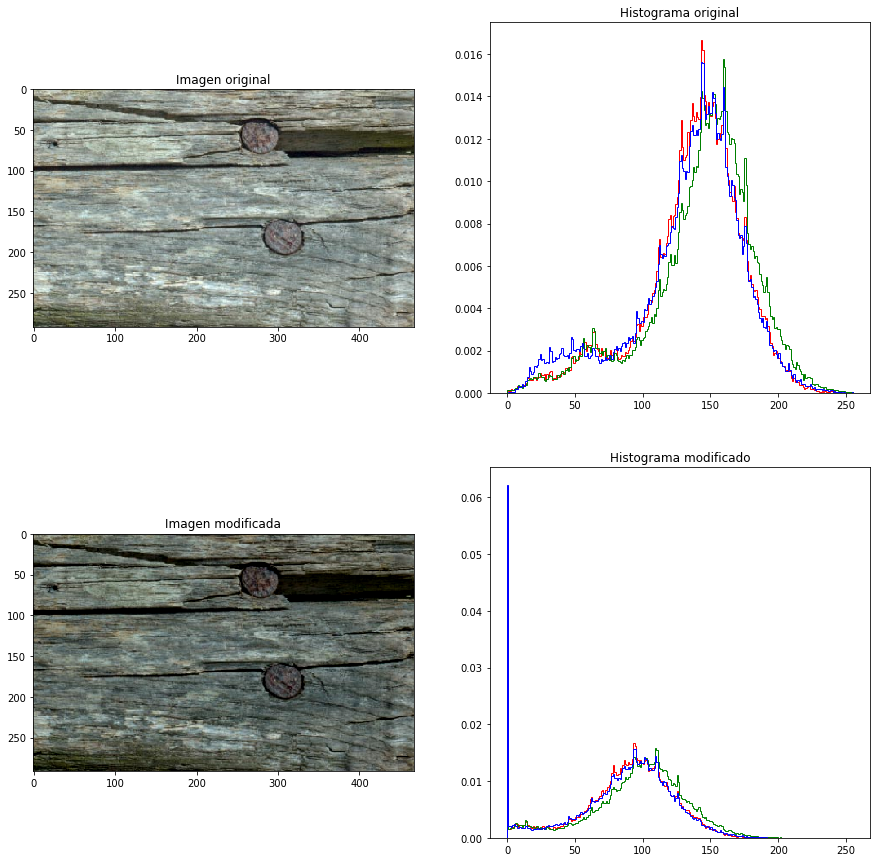

In [38]:
#Se lee la imagen 
img = cv2.cvtColor(cv2.imread('res/m3/example_4.png'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia para editarla
img_subtract = np.zeros(img.shape, np.uint8)
#Se restan q,w,e unidades a los canales de img.
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
q = 50; w = 50; e = 50
img_subtract[:,:,0] = cv2.subtract(img[:,:,0], q)
img_subtract[:,:,1] = cv2.subtract(img[:,:,1], w)
img_subtract[:,:,2] = cv2.subtract(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_subtract, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_subtract[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Negativo de una imagen

El **negativo** de una imagen es considerado un caso particular de la resta en el que se resta el mayor valor de intensidad posible de la imagen, de acuerdo a su resolución en amplitud.

# <center> $ G(x,y) = | b - I(x,y) | $ </center>

Una de las ventajas del **negativo** de una imagen es que este mejora los detalles de color blanco o gris en regiones predominantemente oscuras.




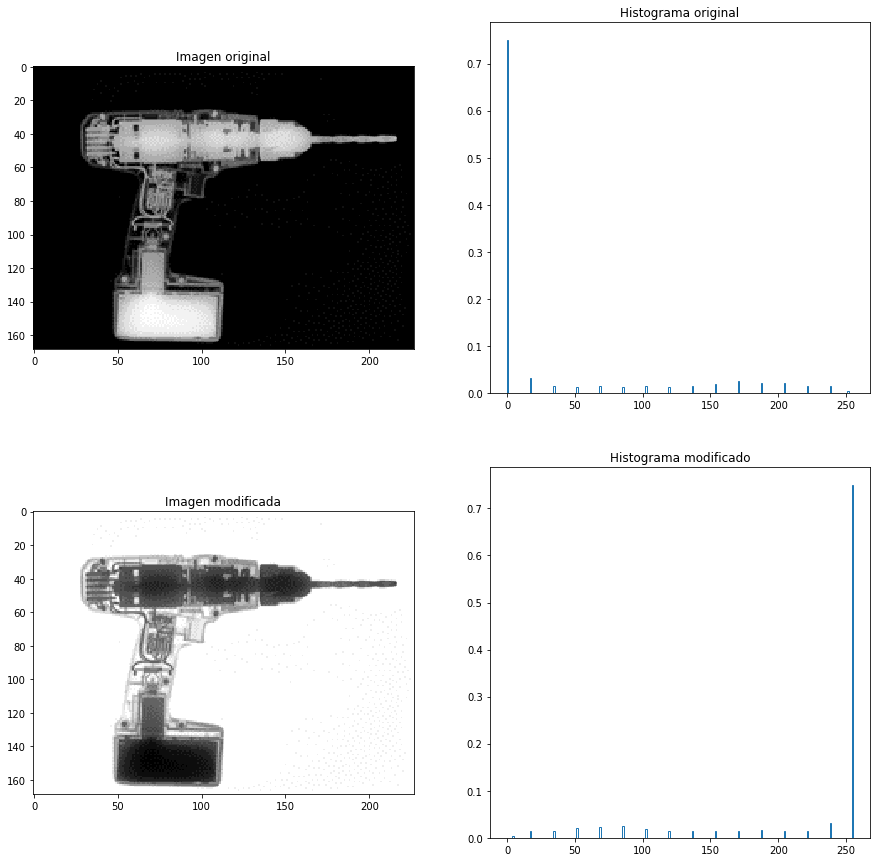

In [39]:
#Leer una imagen en escala de grises
img = cv2.imread('res/taladro.png', cv2.IMREAD_GRAYSCALE)
#Crear la copia de la imagen
img_subtract= np.zeros(img.shape, np.uint8)
#El negativo de la imagen corresponde a restar de la matriz cuyas componentes son 255,
#la matriz de la imagen que cargamos
img_subtract = cv2.subtract(255, img)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
img_array = img.ravel()
_ = arreglo_plots[0,1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_subtract, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
img_array = img_subtract.ravel()
_ = arreglo_plots[1,1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

# Operación de multiplicación 

La **multiplicación** es una operación que permite “estirar” el histograma de una imagen.





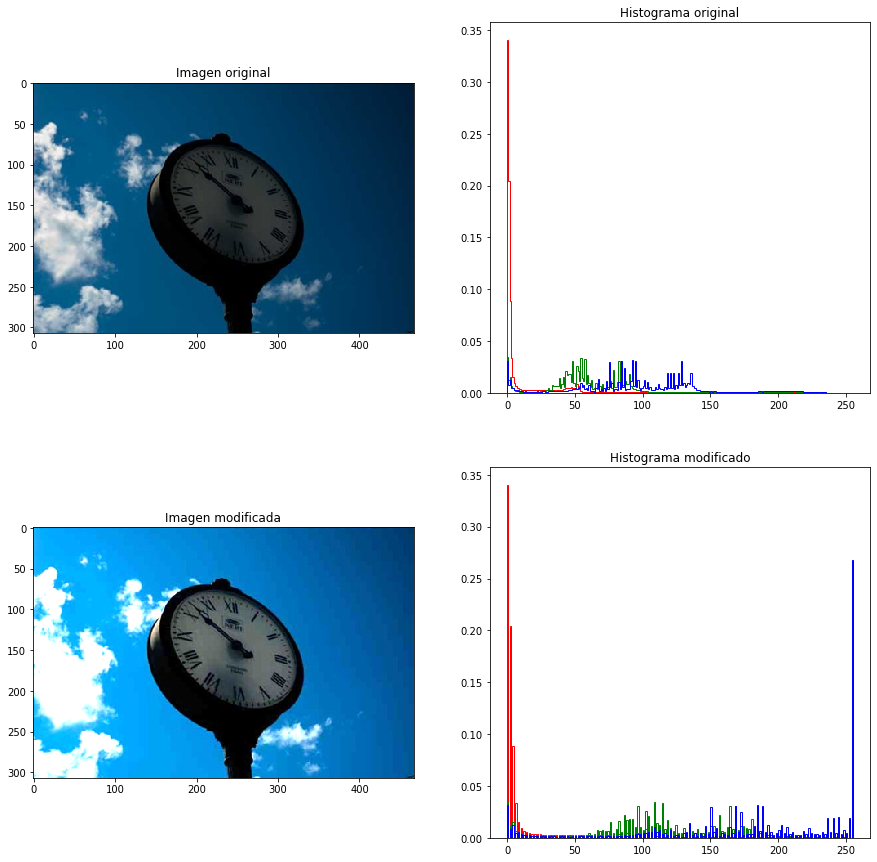

In [40]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia
img_mult = np.zeros(img.shape, np.uint8)

#Se multiplican los valores de cada canal de img por q,w,e unidades
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
q = 2; w = 2; e = 2
img_mult[:,:,0] = cv2.multiply(img[:,:,0], q)
img_mult[:,:,1] = cv2.multiply(img[:,:,1], w)
img_mult[:,:,2] = cv2.multiply(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_mult, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_mult[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

# Operación de división

La **división** es una operación que permite “encoger” el histograma de una imagen.

La división es multiplicar por un valor entre 0 y 1.





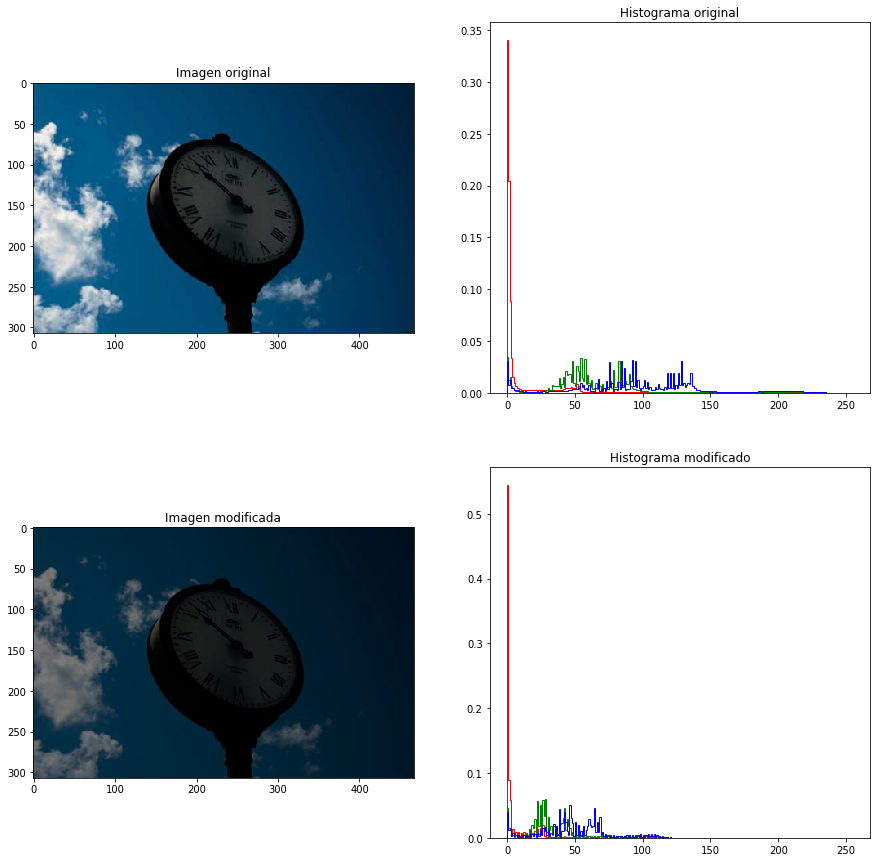

In [41]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/m3/example_2.png'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia
img_div = np.zeros(img.shape, np.uint8)

#Se multiplican los valores de cada canal de img por q,w,e unidades.
# Recordar!! 0 < q < 1,     0 < w < 1,      0 < e < 1
q = 0.5; w = 0.5; e = 0.5
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
img_div[:,:,0] = cv2.multiply(img[:,:,0], q)
img_div[:,:,1] = cv2.multiply(img[:,:,1], w)
img_div[:,:,2] = cv2.multiply(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(img_div, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_div[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

<hr>


## Recapitulemos...

En general, las transformaciones lineales se pueden representar por la función de una línea recta tal que va de N -> N

<img src="res/trans1.png"/>
<img src="res/trans2.png"/>

<hr>

## 3. Transformaciones Logicas
<hr>

Las operaciones lógicas o booleanas en la mayoría de los casos solo tienen sentido cuando una o ambas imágenes son binarias. Cuando se maneja una única imagen binaria, a esta se le suele denominar máscara. La idea consiste entonces en operar dos imágenes utilizando operadores logicos conocidos:
<ul>
    <li>C(x, y):= A(x,y) AND B(x,y)</li>
    <li>C(x, y):= A (x,y) OR B(x,y)</li>
    <li>C(x, y):= A (x,y) XOR B(x,y)</li>
    <li>C(x, y):= NOT  A (x,y) AND B(x,y)</li>
</ul>
<br>
El resultado de una operacion lógica es una imagen compuesta de 0 para los casos en los que la operacion es FALSE, y 1 o 255 cuando la operacion en TRUE.
<br>
<center><i>Figura. Ejemplo de operación lógica o booleana.</i></center>
<img src="res/bool/bool.png" alt="operaciones" style="height:400px"></img>
<br>

# OPERADOR AND

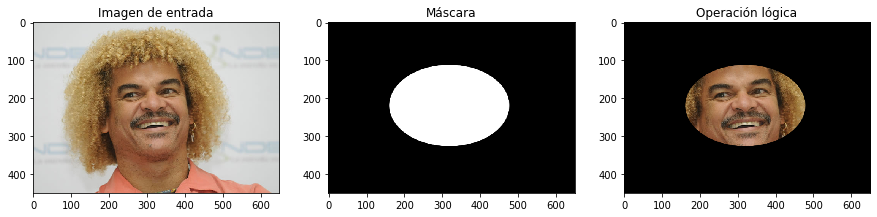

In [42]:
#Se lee la imagen
img = cv2.cvtColor(cv2.imread('res/bool/pibe.jpg'), cv2.COLOR_BGR2RGB)
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/bool/mascara.png')/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = img * mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Operación lógica')
ax1.imshow(img, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

Text(0.5, 1.0, 'Imagen AND')

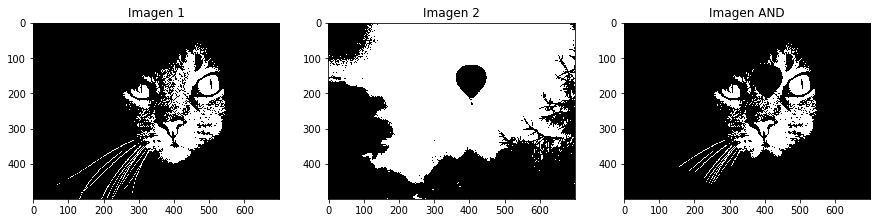

In [43]:
import cv2
import numpy as np
#Otra forma de hacer la operación AND

#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación AND aplicada sobre I1BN e I2BN, análogo al out.
R=cv2.bitwise_and(I1BN,I2BN)
#R = I1BN*I2BN

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen AND")


# OPERADOR OR

Text(0.5, 1.0, 'Imagen OR')

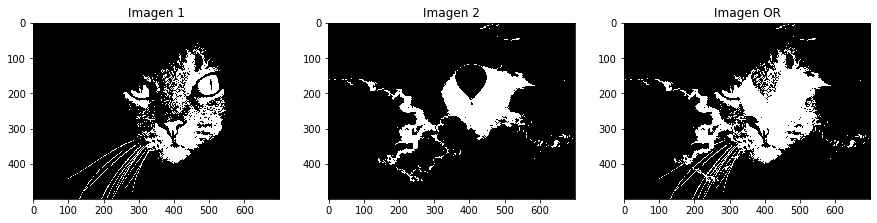

In [44]:
import cv2
import numpy as np
#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,72,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,148,255, cv2.THRESH_BINARY)

#R, corresponde a la operación OR aplicada sobre I1BN e I2BN.
R=cv2.bitwise_or(I1BN,I2BN)

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación OR
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen OR")


# OPERADOR XOR

Text(0.5, 1.0, 'Imagen XOR')

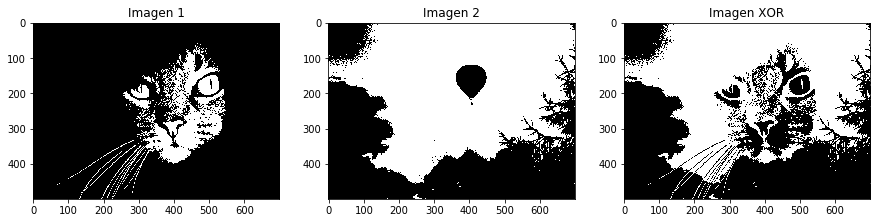

In [45]:
import cv2
import numpy as np

#Se leen las dos imágenes, la entrada I1 y la máscara I2
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("res/bool/globo.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)
Umbral2,I2BN=cv2.threshold(I2,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación XOR aplicada sobre I1BN e I2BN.
R=cv2.bitwise_xor(I1BN,I2BN)

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación XOR
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(I2BN,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen XOR")


# OPERADOR NOT

Text(0.5, 1.0, 'Imagen Negada')

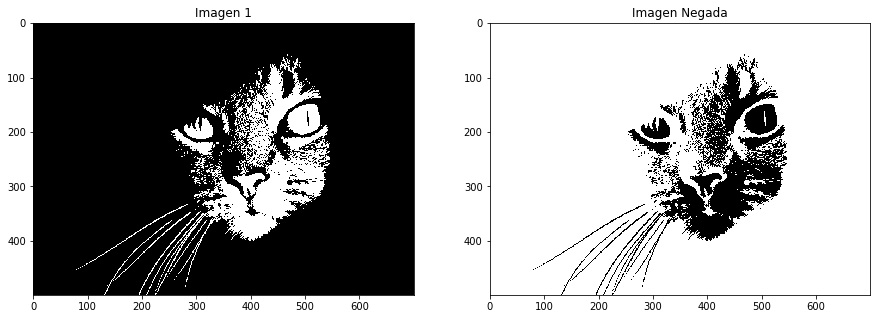

In [46]:
import cv2
import numpy as np

#Se lee la imagen de entrada 
I1=cv2.imread("res/bool/gato.jpg",cv2.IMREAD_GRAYSCALE)

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,I1BN=cv2.threshold(I1,60,255, cv2.THRESH_BINARY)

#R, corresponde a la operación NOT aplicada sobre I1BN e I2BN.
R=cv2.bitwise_not(I1BN)

#Generar un subplot 1x2 para mostrar la imagen de entrada y la operación NOT
fig = plt.figure(figsize=(15,24))

plt.subplot(1,2,1)
plt.imshow(I1BN,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,2,2)
plt.imshow(R,cmap='gray')
plt.title("Imagen Negada")

<hr>

### Analicemos
<br>
<center><i>Figura. Dadas las dos primeras imágenes, ¿qué operador booleano debe usarse para generar la tercera imagen? Las imágenes se arroz1.png y arroz2.png se encuentran en la carpeta res/bool. </i></center>
<img src="res/bool/bool_2.png" alt="operaciones" style="height:200px"></img>
<br>

<!-- ![image.png](attachment:image.png) --> 
